In [1]:
import pandas as pd
import numpy as np
import unidecode
import html5lib
import matplotlib as mpl
from adjustText import adjust_text
import matplotlib.pyplot as plt

In [2]:
background = '#D7E5E5'
mpl.rcParams['font.family']= 'Candara'
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.weight'] = 'bold'
mpl.rcParams['legend.title_fontsize'] = 15
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['savefig.facecolor']='white'
mpl.rcParams['axes.titleweight'] = 'heavy'
mpl.rcParams['axes.labelweight'] = 'heavy'

In [66]:
url = 'https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv'
d = pd.read_csv(url)

In [67]:
d = d[d['season'] == 2021]
d = d[d['league'] == 'Barclays Premier League']
d

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
44664,2021,2021-08-13,2411,Barclays Premier League,Brentford,Arsenal,62.47,80.58,0.2240,0.5209,...,39.2,44.5,2.0,0.0,1.41,1.21,1.01,2.27,2.03,0.00
44684,2021,2021-08-14,2411,Barclays Premier League,Manchester United,Leeds United,85.22,71.90,0.6282,0.1622,...,58.5,28.8,5.0,1.0,1.42,0.66,0.91,0.76,5.25,1.05
44703,2021,2021-08-14,2411,Barclays Premier League,Burnley,Brighton and Hove Albion,64.53,73.89,0.3356,0.3888,...,34.4,23.0,1.0,2.0,1.95,1.77,0.75,1.50,1.05,2.10
44726,2021,2021-08-14,2411,Barclays Premier League,Chelsea,Crystal Palace,88.33,62.22,0.7531,0.0769,...,57.3,37.4,3.0,0.0,1.08,0.36,1.49,0.48,3.15,0.00
44727,2021,2021-08-14,2411,Barclays Premier League,Watford,Aston Villa,60.59,72.10,0.3067,0.4283,...,41.1,21.7,3.0,2.0,1.17,1.21,0.68,1.26,3.15,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55411,2021,2022-05-22,2411,Barclays Premier League,Norwich City,Tottenham Hotspur,48.57,83.25,0.0701,0.7882,...,0.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55412,2021,2022-05-22,2411,Barclays Premier League,Liverpool,Wolverhampton,93.32,69.61,0.8240,0.0454,...,70.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55413,2021,2022-05-22,2411,Barclays Premier League,Brentford,Leeds United,72.95,62.24,0.4537,0.3016,...,0.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55414,2021,2022-05-22,2411,Barclays Premier League,Arsenal,Everton,78.94,65.25,0.5797,0.1810,...,21.2,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
d = d.replace({
    'team1':{
        'Brighton and Hove Albion' : 'Brighton',
        'Wolverhampton' : 'Wolves',
        'Tottenham Hotspur' : 'Spurs',
        'Manchester United' : 'Man United',
        'Manchester City' : 'Man City',
        'West Ham United' : 'West Ham'
    },
    'team2':{
        'Brighton and Hove Albion' : 'Brighton',
        'Wolverhampton' : 'Wolves',
        'Tottenham Hotspur' : 'Spurs',
        'Manchester United' : 'Man United',
        'Manchester City' : 'Man City',
        'West Ham United' : 'West Ham'
    }
})
d

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
44664,2021,2021-08-13,2411,Barclays Premier League,Brentford,Arsenal,62.47,80.58,0.2240,0.5209,...,39.2,44.5,2.0,0.0,1.41,1.21,1.01,2.27,2.03,0.00
44684,2021,2021-08-14,2411,Barclays Premier League,Man United,Leeds United,85.22,71.90,0.6282,0.1622,...,58.5,28.8,5.0,1.0,1.42,0.66,0.91,0.76,5.25,1.05
44703,2021,2021-08-14,2411,Barclays Premier League,Burnley,Brighton,64.53,73.89,0.3356,0.3888,...,34.4,23.0,1.0,2.0,1.95,1.77,0.75,1.50,1.05,2.10
44726,2021,2021-08-14,2411,Barclays Premier League,Chelsea,Crystal Palace,88.33,62.22,0.7531,0.0769,...,57.3,37.4,3.0,0.0,1.08,0.36,1.49,0.48,3.15,0.00
44727,2021,2021-08-14,2411,Barclays Premier League,Watford,Aston Villa,60.59,72.10,0.3067,0.4283,...,41.1,21.7,3.0,2.0,1.17,1.21,0.68,1.26,3.15,2.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55411,2021,2022-05-22,2411,Barclays Premier League,Norwich City,Spurs,48.57,83.25,0.0701,0.7882,...,0.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55412,2021,2022-05-22,2411,Barclays Premier League,Liverpool,Wolves,93.32,69.61,0.8240,0.0454,...,70.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55413,2021,2022-05-22,2411,Barclays Premier League,Brentford,Leeds United,72.95,62.24,0.4537,0.3016,...,0.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55414,2021,2022-05-22,2411,Barclays Premier League,Arsenal,Everton,78.94,65.25,0.5797,0.1810,...,21.2,22.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
teams = list(set(d['team1'].to_list()))
teams.sort()
teams

['Arsenal',
 'Aston Villa',
 'Brentford',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'Man City',
 'Man United',
 'Newcastle',
 'Norwich City',
 'Southampton',
 'Spurs',
 'Watford',
 'West Ham',
 'Wolves']

In [83]:
spis = {}
for i in teams:
    spis[i] = []
spis

{'Arsenal': [],
 'Aston Villa': [],
 'Brentford': [],
 'Brighton': [],
 'Burnley': [],
 'Chelsea': [],
 'Crystal Palace': [],
 'Everton': [],
 'Leeds United': [],
 'Leicester City': [],
 'Liverpool': [],
 'Man City': [],
 'Man United': [],
 'Newcastle': [],
 'Norwich City': [],
 'Southampton': [],
 'Spurs': [],
 'Watford': [],
 'West Ham': [],
 'Wolves': []}

In [84]:
for i in range(380):
    spis[d.iloc[i]['team1']].append(d.iloc[i]['spi1'])
    spis[d.iloc[i]['team2']].append(d.iloc[i]['spi2'])

Text(0.125, 0.02, 'Data Source - FiveThirtyEight. Prepared by Saankhya Mondal.')

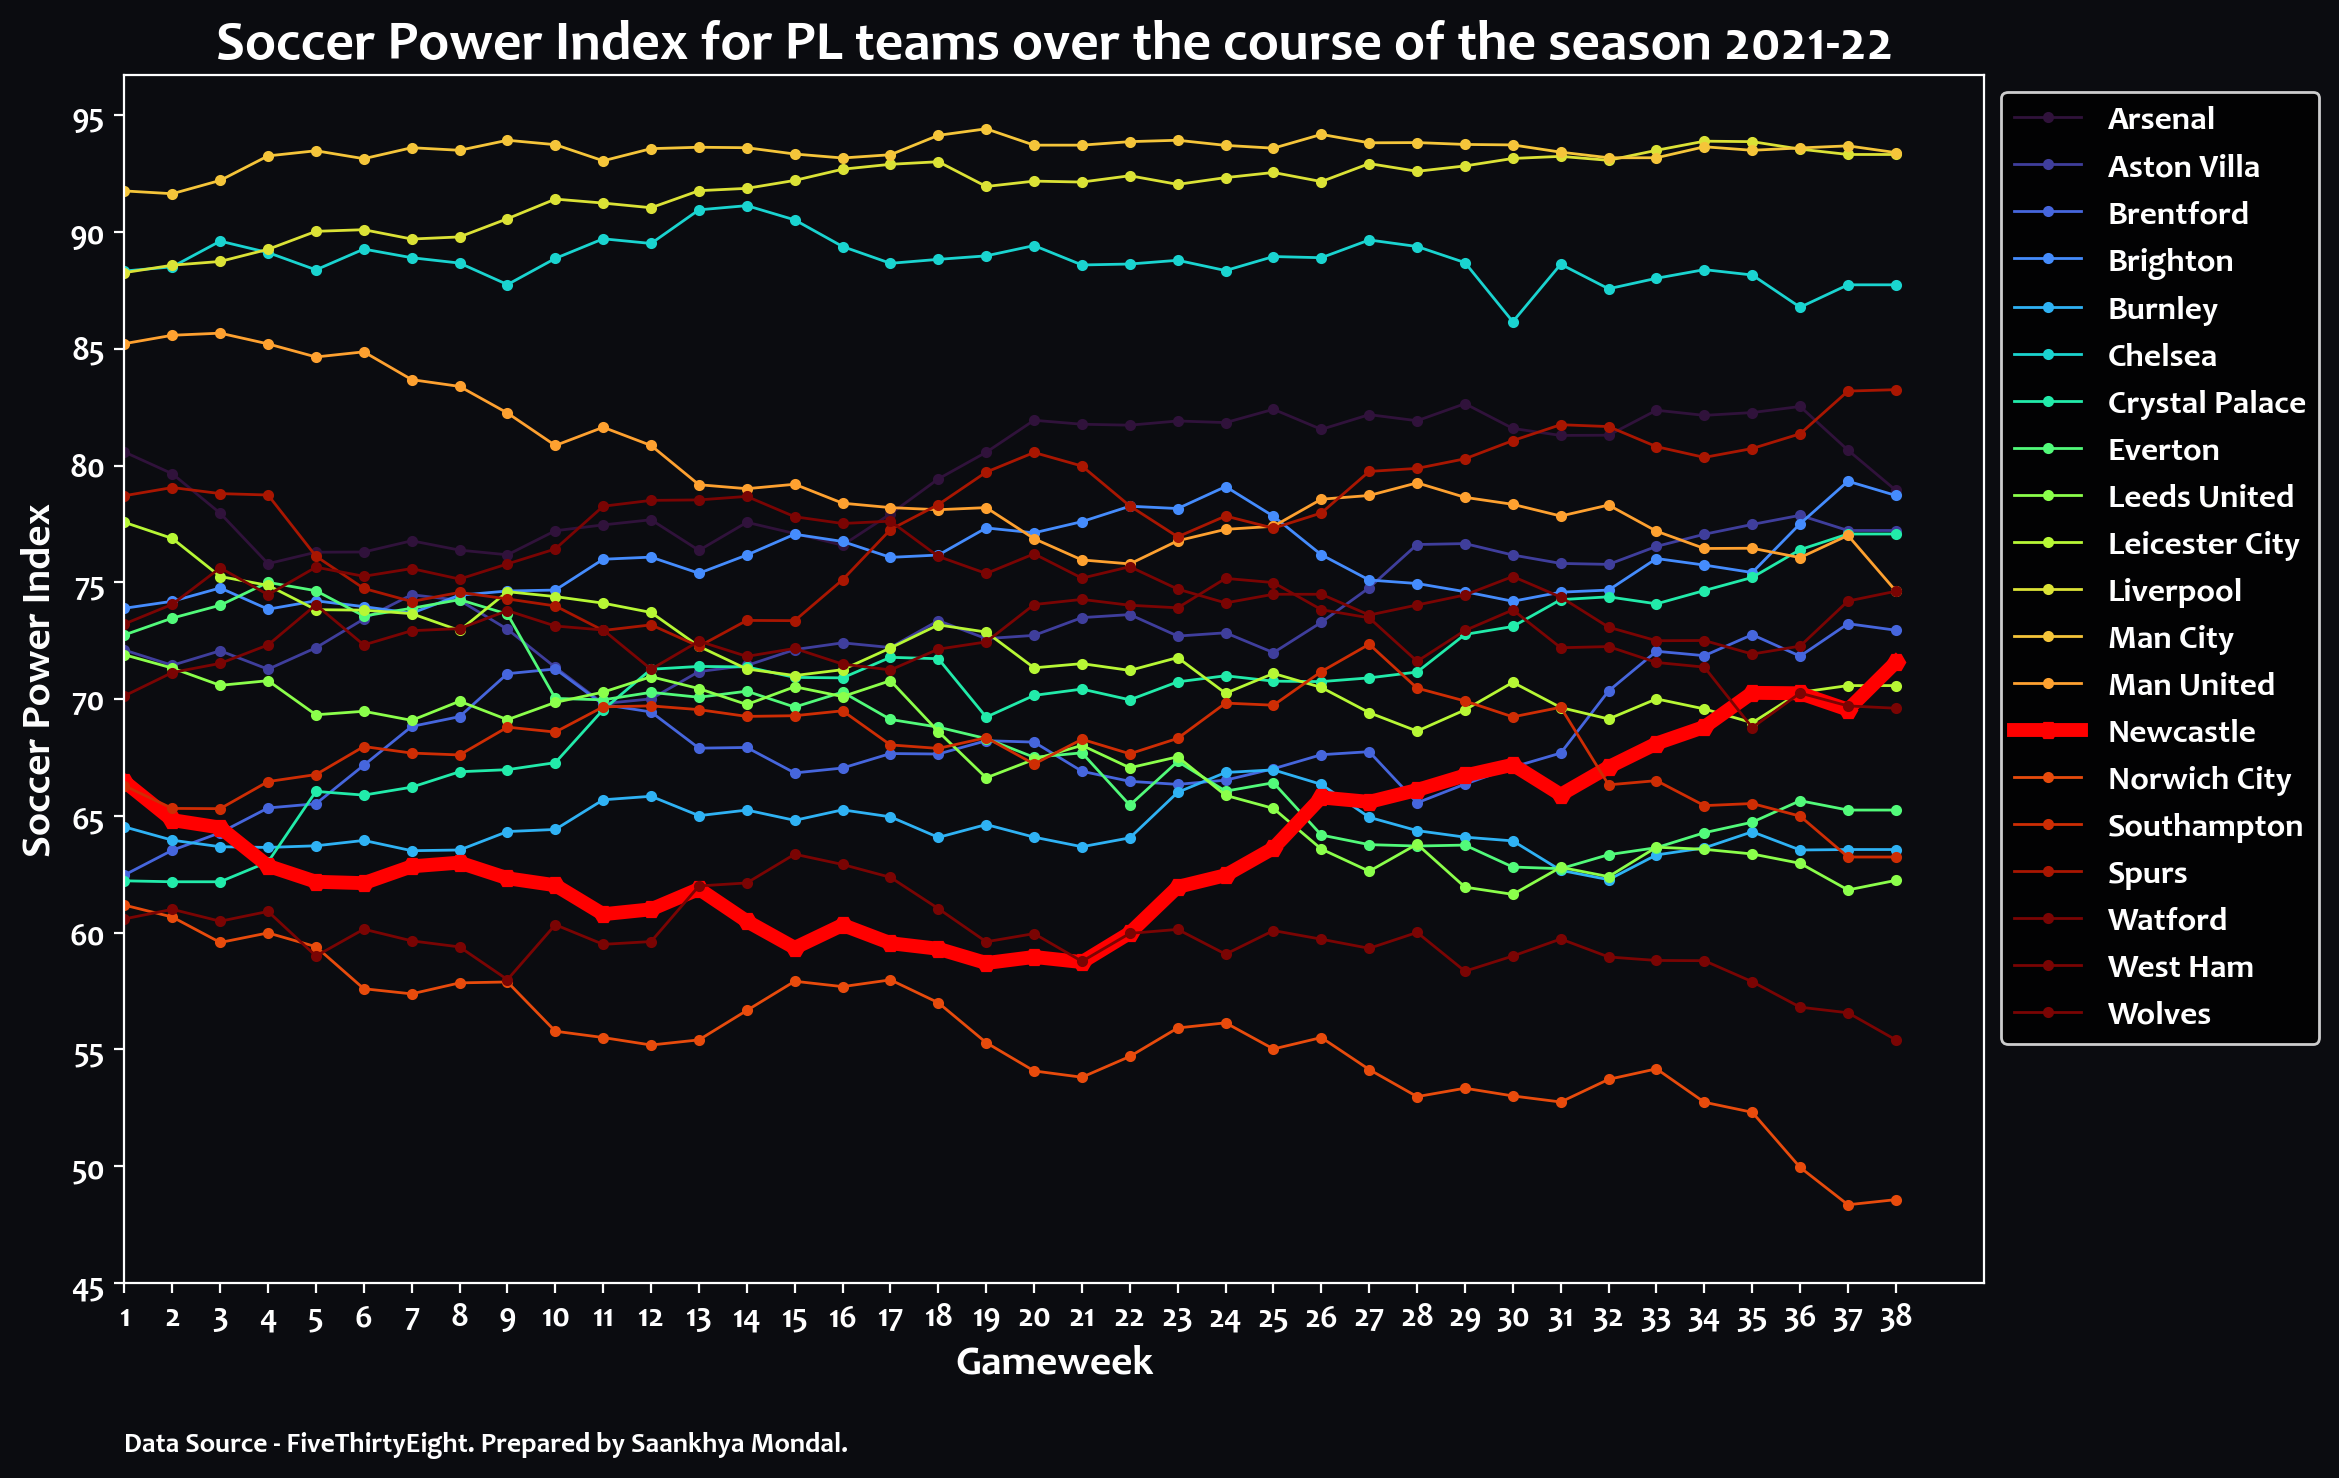

In [170]:
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          'legend.edgecolor': 'w',
          'legend.facecolor': 'black',
          'legend.labelcolor': 'w',}
mpl.rcParams.update(params)
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_dpi(200)
ax.set_facecolor('#0b0c10')
fig.set_facecolor('#0b0c10')
fig.set_edgecolor('#0b0c10')
cm = plt.get_cmap('turbo')
gw = [i for i in range(1, 39)]
flag = 1
for count, team in enumerate(teams):
    if 'Newcastle' in team:
        plt.plot(gw, spis[team], marker='H', c='red', linewidth=5, label='Newcastle United')
    else:
        if flag:
            plt.plot(gw, spis[team], marker='.', c=cm(count*15), linewidth=1, label='Others')
            flag = 0
        else:
            plt.plot(gw, spis[team], marker='.', c=cm(count*15), linewidth=1)

ax.legend(teams, bbox_to_anchor=(1, 1))
# ax.legend()
plt.xlim(1)
ax.set_xticks([i for i in range(1, 39, 1)])
ax.set_yticks([i for i in range(45, 96, 5)])
ax.set_title('Soccer Power Index for PL teams over the course of the season 2021-22', fontsize=20, c='white')
ax.set_xlabel('Gameweek', fontsize=15)
ax.set_ylabel('Soccer Power Index', fontsize=15)
fig.text(0.125,0.02,'Data Source - FiveThirtyEight. Prepared by Saankhya Mondal.', size=10, c='white')

In [ ]:
fig.savefig('Images/SPI_NUFC.png', dpi=1000, bbox_inches='tight', facecolor=fig.get_facecolor())

In [57]:
teams

['Arsenal',
 'Aston Villa',
 'Brentford',
 'Brighton and Hove Albion',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Leeds United',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester United',
 'Newcastle',
 'Norwich City',
 'Southampton',
 'Tottenham Hotspur',
 'Watford',
 'West Ham United',
 'Wolverhampton']